# TED Talks EDA - By Mauricio Sandoval

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## First steps - A wide analysis

The first step is to look into null values and duplicates, so we can clean our dataset

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ted-talks/data.csv


In [3]:
df = pd.read_csv('/kaggle/input/ted-talks/data.csv')
df.isna().sum(), df.duplicated().sum()

(title     0
 author    1
 date      0
 views     0
 likes     0
 link      0
 dtype: int64,
 0)

Once we realize that there is only 1 missing value on the authors columns, we just drop it. From now we will be working with 5439 rows. Lets display the first 5 values to have a better understanding of the data

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5439 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5439 non-null   object
 1   author  5439 non-null   object
 2   date    5439 non-null   object
 3   views   5439 non-null   int64 
 4   likes   5439 non-null   int64 
 5   link    5439 non-null   object
dtypes: int64(2), object(4)
memory usage: 297.4+ KB


In [5]:
df.head(5)

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


The probability of finding more than 1 talk by author, let check the total numbers of talks presenters on our dataset

In [6]:
df.author.nunique()

4443

We have 4443 different authors, so an average of 1.22 talks per author.

Now lets move to more detailed analysis. We will compute the rate of likes per view for all the talks, so on the future it might help us to find talks with higher approval than the rest.

After that we will take the first look into some descriptive statistics. This is the first approach for finding interesting insights

In [7]:
df['rate_l'] = round(df.likes/df.views,4)

In [8]:
df = df.sort_values(by=['views'], ascending = False)
df.head(5)

,title,author,date,views,likes,link,rate_l
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...,0.0292
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...,0.0297
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_min...,0.0300
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...,0.0298
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...,0.0304


In [9]:
df.describe()

,views,likes,rate_l
count,5.439000e+03,5.439000e+03,5439.000000
mean,2.061955e+06,6.261912e+04,0.030218
std,3.567316e+06,1.076533e+05,0.000788
min,1.200000e+03,3.700000e+01,0.027500
25%,6.710000e+05,2.000000e+04,0.029900
50%,1.300000e+06,4.100000e+04,0.030000
75%,2.100000e+06,6.500000e+04,0.030700
max,7.200000e+07,2.100000e+06,0.032900


We can see that the range of the fourth quartile is around 35x bigger the IQR. Let's plot the data on a boxplot to see its distribution

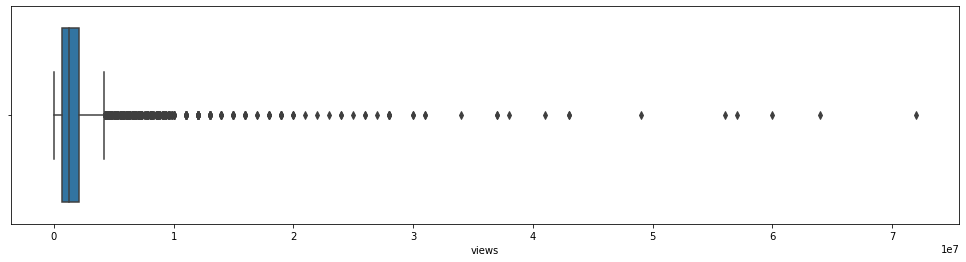

In [10]:
plt.figure(figsize=(17,4))
ax = sns.boxplot(x='views', data=df)

As expected, we can find a large number of talks whose views are far from the average. We can't assume that are outliers. In this case, we'll call them ***Trending Talks*** 

Regarding these talks, we could suppose that the rate of likes over views might be bigger than the others, so it may explain why they became so popular

In [11]:
df.corr()

,views,likes,rate_l
views,1.000000,0.999661,0.109775
likes,0.999661,1.000000,0.120181
rate_l,0.109775,0.120181,1.000000


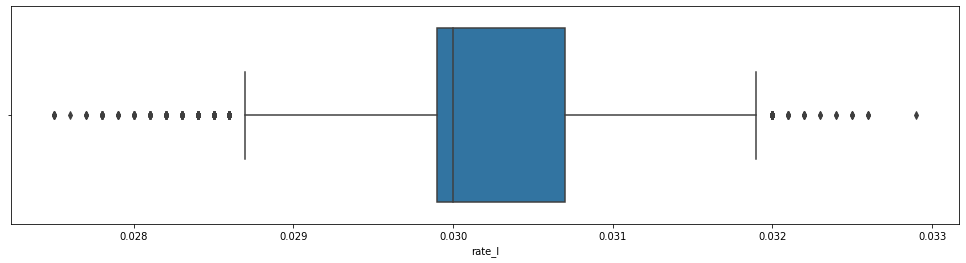

In [12]:
plt.figure(figsize=(17,4))
ax = sns.boxplot(x=df.rate_l)

Using a simple correlation matrix, we see that most of the number of likes might be correlated with the number of views, but them rate is not as correlated as expected.

Ploting a boxplot for the rate of likes over views, we can see a very concentrated distribution. It seems that only the 3% of viewers are willing to express are willing to express their satisfaction with the content

***After this first approach to the data, where we find that there is a group of Trending talks, and that people is not very willing to share their satisfaction, let see how has the penetration of this type of content evolved over the years***

## An historical Overview

***Let's start by a quick data preprocessing for getting more disaggregated date information***

Lets compute the year and the month of the talk separately

In [13]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['date_format'] = pd.to_datetime(df['date'])
df.head(5)

,title,author,date,views,likes,link,rate_l,year,month,date_format
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...,0.0292,2006,2,2006-02-01
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...,0.0297,2012,6,2012-06-01
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_min...,0.0300,2016,2,2016-02-01
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...,0.0298,2009,9,2009-09-01
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...,0.0304,2010,6,2010-06-01


First, let see the yearly growth of the talks audience by grouping the dataset by year and sorting it

In [14]:
year = df.groupby(by=['year']).agg({'views':'sum','likes':'sum', 'title' : 'count'}).rename(columns={'title':'count'}).sort_values(by=['views'], ascending = False)
year.reset_index(inplace=True)
year.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
year,2015,2013,2017,2019,2016,2014,2018,2012,2020,2011,...,2022,2001,1998,1972,1984,1990,1994,1983,1991,1970
views,1154739598,1062537497,998891600,948119299,928894896,824652297,811857597,803186000,635944200,575677999,...,11470000,10530000,7410000,1300000,1100000,723000,699000,690000,327000,252000
likes,35151746,32249916,30516328,28764575,28306782,25076665,24671493,24331209,19297014,17478900,...,341254,315100,226100,41000,33000,21000,20000,20000,9800,7500
count,376,388,495,544,399,357,473,302,501,271,...,20,5,6,1,1,1,1,1,1,2


We can see that before the 2000's the audience was very small, so lets plot the growth ***just starting from the 2001***

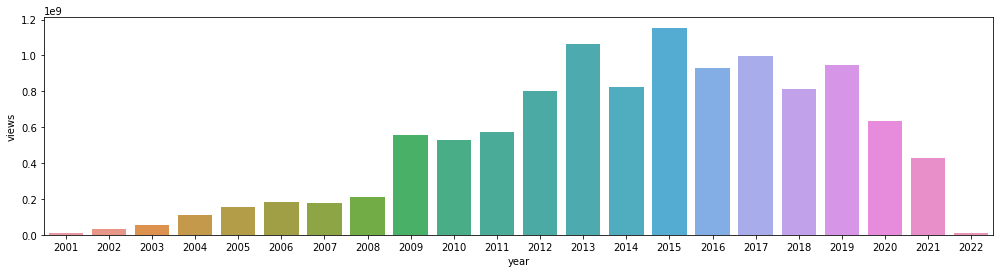

In [15]:
plt.figure(figsize=(17,4))
ax = sns.barplot(x='year', y='views', data = year[year.year > 2000])

As we notice, the audience grew (not constantly) until the 2015. But, does it mean that more people start watching TED talks or its a fixed number of people that watch several talks? Maybe if we see the number of talks we could find something about it.

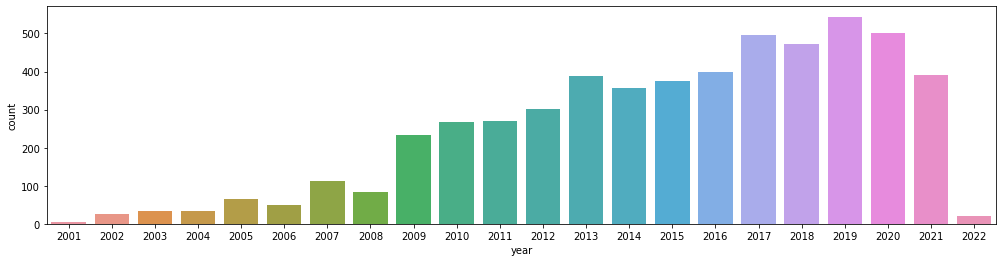

In [16]:
plt.figure(figsize=(17,4))
ax = sns.barplot(x='year', y='count', data = year[year.year > 2000])

Not a surprise, the number of talks was also growing since 2001 until 2019, from where we can see a decrease (***Beacuse Covid19? We don't know***)

Even that, both plots isolated are hiding something, i guess. ***Let see the average number of views per year!*** The correlation between the number of views and the number of talks already shows that we could find a smoother behavior

In [17]:
year.corr()

,year,views,likes,count
year,1.000000,0.679605,0.679181,0.731571
views,0.679605,1.000000,0.999991,0.930799
likes,0.679181,0.999991,1.000000,0.930745
count,0.731571,0.930799,0.930745,1.000000


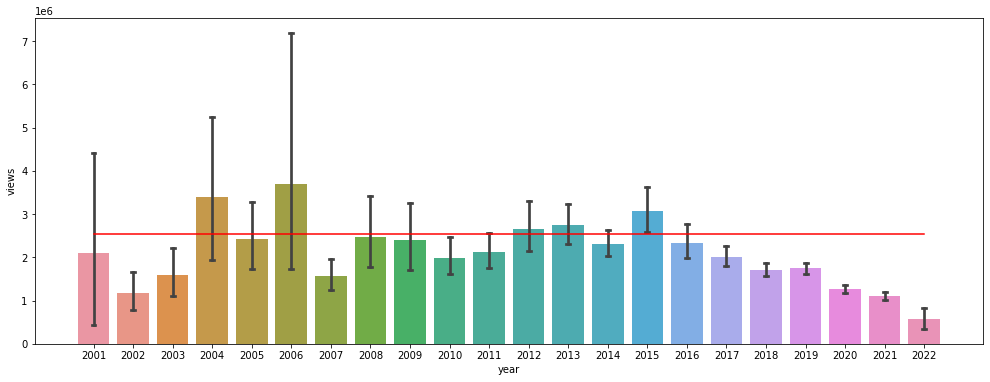

In [18]:
plt.figure(figsize=(17,6))
ax = sns.barplot(x='year', y='views', data = df[df.year>2000], capsize=.1)
ax2 = sns.lineplot(x=range(0,22), y=2550000, color = 'red')

Ok! So, from 2008 the average number of views remained quite steady until the 2017, from where we can see a constant decrease. So, lets talk about causality: 

***Is the number of talks being reduced because people no longer show the same interest?*** Maybe. Some kind of competitor? The Webinars boom since Covid-19 begins? Format out?

And now, only for curiosity, lets see how our ***Trending talks*** are distributed along the years.

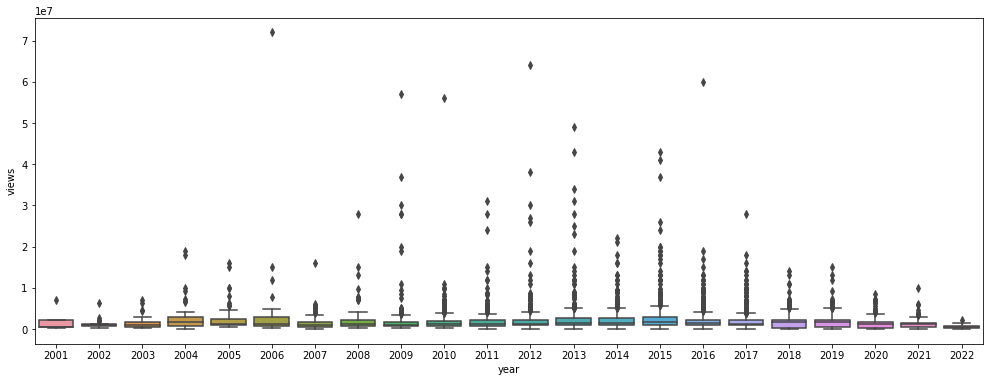

In [19]:
plt.figure(figsize=(17,6))
ax = sns.boxplot(x='year', y='views', data = df[df.year>2000])

Once again it seems that from 2017 until now there are no longer ***Trending talks***, Maybe 2022 has something for us.

Now, let disaggregate the date including the month:

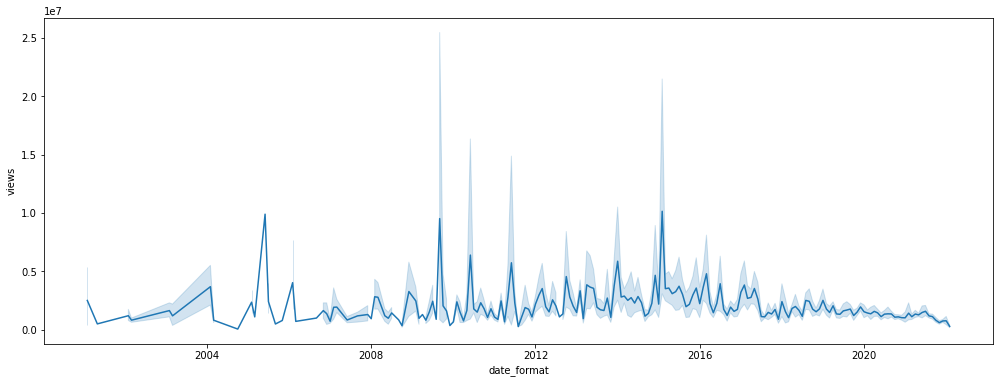

In [20]:
plt.figure(figsize=(17,6))
ax = sns.lineplot(x='date_format', y='views', data = df[df.year>2000])

***Too much noise!!!*** Lets move to something more didactic. Is the some kind of seasonality? Does people watch more Ted talks during some periods of the year?

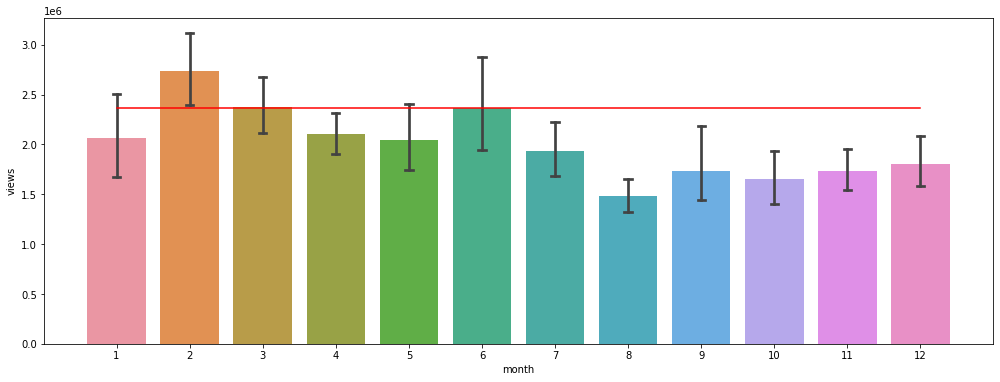

In [21]:
plt.figure(figsize=(17,6))
ax = sns.barplot(x='month', y='views', data = df, capsize=.1)
ax2 = sns.lineplot(x=range(0,12), y=2370000, color = 'red')

***So more interesting!*** Ploting the average number of views per month with their respective Confidence Interval (95), we could say with 95% certainty that more people watch TED talks on February than the months from July to December

***How is it going until here??*** Are you interested on who are the most popular authors??

## The most popular authors

***Thanks for joining me and this analysis until here!***

Time to start again. What about finding the author with the highest number of views?

In [22]:
auth = df.groupby(by=['author']).agg({'views':'sum','likes':'sum', 'title' : 'count'}).rename(columns={'title':'counts'}).sort_values(by=['views'], ascending = False)
auth.reset_index(inplace=True)
auth.head(10)

,author,views,likes,counts
0,Alex Gendler,187196000,5691000,45
1,Sir Ken Robinson,95654000,2833600,5
2,Bill Gates,77800000,2349000,8
3,Simon Sinek,74800000,2246000,3
4,Brené Brown,72000000,2204000,2
5,Julian Treasure,64300000,1870000,5
6,Amy Cuddy,64000000,1900000,1
7,Tim Urban,60000000,1800000,1
8,Iseult Gillespie,54998000,1660900,33
9,Mia Nacamulli,44174000,1395000,5


We got them! But, it seems quite unfair to compare authors with 45 talks with authors with only one talk. So on the next step, we will start looking on the average number of views per author, and also we will classify them by the number of talks that they have.

***We'll divide them between those who have only 1 talk, 2 talks and 3 or more talks***

In [23]:
auth = df.groupby(by=['author']).agg({'views':'mean','likes':'sum', 'title' : 'count'}).rename(columns={'title':'counts'}).sort_values(by=['views'], ascending = False)
auth.reset_index(inplace=True)
auth.loc[auth['counts'] > 2, '3+'] = '3+'
auth.loc[auth['counts'] == 2, '3+'] = '2'
auth.loc[auth['counts'] == 1, '3+'] = '1'
auth.head(10)

,author,views,likes,counts,3+
0,Amy Cuddy,64000000.0,1900000,1,1
1,Tim Urban,60000000.0,1800000,1,1
2,Sam Berns,43000000.0,1300000,1,1
3,Robert Waldinger,41000000.0,1200000,1,1
4,Cameron Russell,38000000.0,1100000,1,1
5,Graham Shaw,37000000.0,1100000,1,1
6,Mary Roach,37000000.0,1100000,1,1
7,Brené Brown,36000000.0,2204000,2,2
8,Tom Thum,34000000.0,1000000,1,1
9,Pamela Meyer,31000000.0,953000,1,1


Bingo! a first insight! From the 10 author with the higher number of average views, only 1 has more than 1 talks. So in addition to having trending talks, Can we say that we have a large group of ***One hit wonders??***, Sorry about it.

On the next step, we will save a list with the 25 authors with more than 1 talks that have the highest number of average views, we will call them our popular authors. After that, we will include the information of the number of talks to our main dataset.

In [24]:
populars = auth[auth.counts>1].head(25)
list_aut = populars.author.to_list()

In [25]:
df = df.merge(auth[['author','3+']], left_on='author', right_on='author', how='left')
df.head(5)

,title,author,date,views,likes,link,rate_l,year,month,date_format,3+
0,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...,0.0292,2006,2,2006-02-01,3+
1,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...,0.0297,2012,6,2012-06-01,1
2,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_min...,0.0300,2016,2,2016-02-01,1
3,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...,0.0298,2009,9,2009-09-01,3+
4,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...,0.0304,2010,6,2010-06-01,2


Now that we have the number of talks: ***Trending talks vs OHW??***

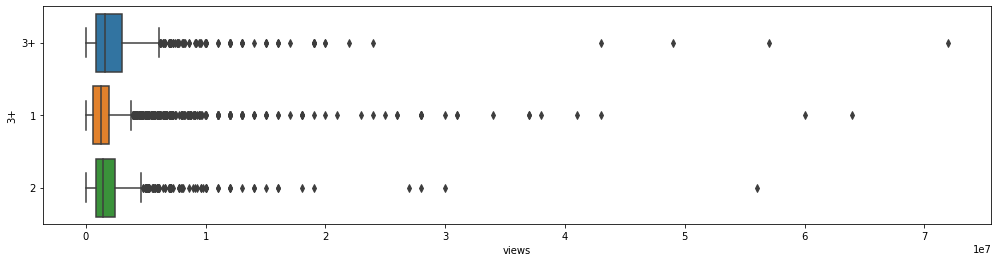

In [26]:
plt.figure(figsize=(17,4))
g = sns.boxplot(x='views',y='3+',data=df)

Fair enough, we can find trending talks on people with 1,2 or more number of talks (Despite the number of OHW seems a little bigger).

Now, lets focus on our list of popular authors. We will take a subset from our data only including those authors with 2 or more talks. (Only 825 rows)

In [27]:
df_pop = df.loc[df['author'].isin(list_aut)]
df_pop = df_pop.merge(populars[['author']], left_on='author', right_on='author', how='left')
print(df_pop.size)
df_pop.head(5)

825


,title,author,date,views,likes,link,rate_l,year,month,date_format,3+
0,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...,0.0292,2006,2,2006-02-01,3+
1,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...,0.0298,2009,9,2009-09-01,3+
2,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...,0.0304,2010,6,2010-06-01,2
3,How to speak so that people want to listen,Julian Treasure,June 2013,49000000,1400000,https://ted.com/talks/julian_treasure_how_to_s...,0.0286,2013,6,2013-06-01,3+
4,The next outbreak? We're not ready,Bill Gates,March 2015,43000000,1300000,https://ted.com/talks/bill_gates_the_next_outb...,0.0302,2015,3,2015-03-01,3+


Once we already have the data, what about ploting the average number of views per author? ***Maybe we could find the most popular one!***

[Text(0, 0, 'Sir Ken Robinson'),
 Text(1, 0, 'Simon Sinek'),
 Text(2, 0, 'Brené Brown'),
 Text(3, 0, 'Julian Treasure'),
 Text(4, 0, 'Bill Gates'),
 Text(5, 0, 'Chimamanda Ngozi Adichie'),
 Text(6, 0, 'Elon Musk'),
 Text(7, 0, 'Jon Ronson'),
 Text(8, 0, 'Helen M. Farrell'),
 Text(9, 0, 'Elizabeth Gilbert'),
 Text(10, 0, 'Adam Grant'),
 Text(11, 0, 'Esther Perel'),
 Text(12, 0, 'Maz Jobrani'),
 Text(13, 0, 'Dan Gilbert'),
 Text(14, 0, 'Johann Hari'),
 Text(15, 0, 'Mia Nacamulli'),
 Text(16, 0, 'Hugh Herr'),
 Text(17, 0, 'Richard St. John'),
 Text(18, 0, "Raffaello D'Andrea"),
 Text(19, 0, 'Matt Cutts'),
 Text(20, 0, 'Guy Winch'),
 Text(21, 0, 'Andrew Solomon'),
 Text(22, 0, 'Ray Laurence'),
 Text(23, 0, 'Lisa Winer'),
 Text(24, 0, 'Murat Dalkilinç')]

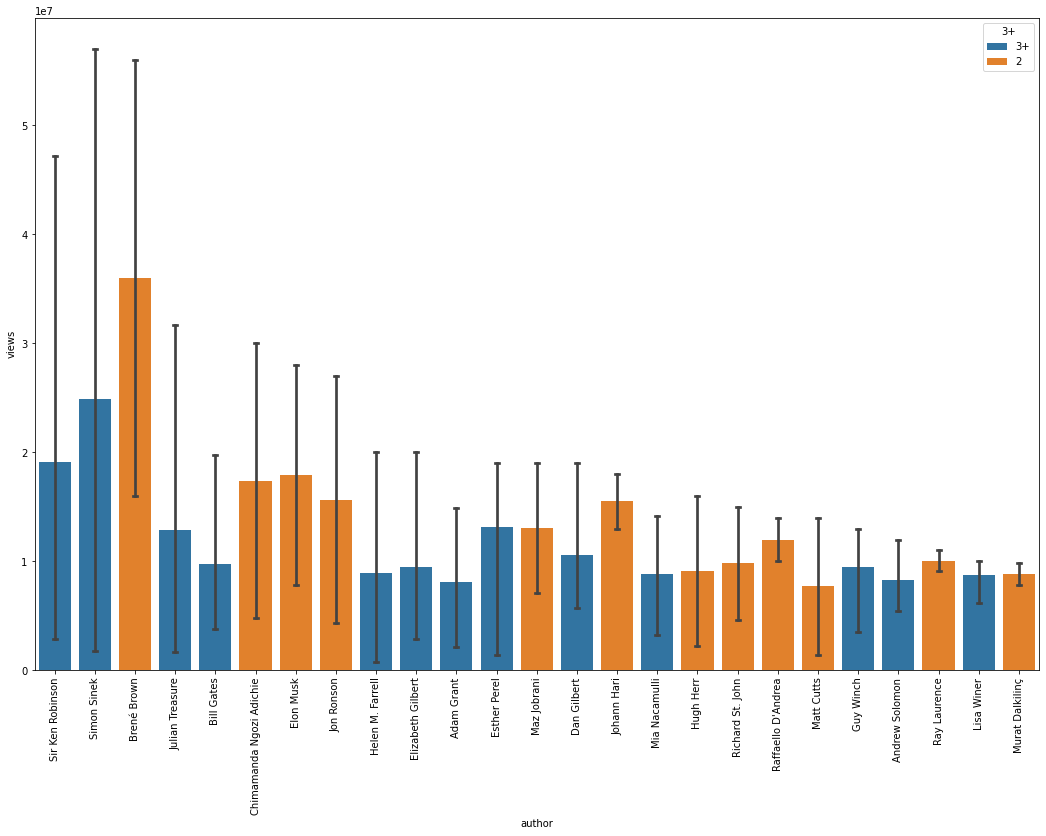

In [28]:
plt.figure(figsize=(18,12))
ax = sns.barplot(x='author', y='views', data = df_pop, capsize=.1, hue='3+', dodge = False)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)